In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import pycountry_convert as pc
import warnings
from datetime import datetime, timedelta, date
warnings.filterwarnings("ignore")

%matplotlib inline

# Import data

In [2]:
# Confirmed cases dataset.
df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

# Rename some columns.
df_confirmed = df_confirmed.rename(columns={"Country/Region": "Country", "Province/State": "State"})
df_confirmed.head()

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178295,178352,178373,178387,178418,178457,178513,178574,178611,178638
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,274320,274376,274429,274462,274504,274520,274535,274606,274606,274737
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265731,265733,265738,265739,265739,265741,265746,265746,265754,265761
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,40709,40709,40709,40709,40709,40709,40709,41013,41013,41013
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99287,99287,99287,99287


In [3]:
# Confirmed deaths dataset.
df_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

# Rename some columns.
df_deaths = df_deaths.rename(columns={"Country/Region": "Country", "Province/State": "State"})
df_deaths.head()

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7676,7676,7676,7676,7678,7679,7680,7680,7680,7680
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3494,3495,3495,3496,3496,3496,3496,3496,3496,3496
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6874
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [11]:
# Covid-19 dataset.
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

# Drop columns that are not required.
df_covid19.drop(["Last_Update", "People_Tested", "People_Hospitalized", "UID", "ISO3"], inplace=True, axis=1)

# Rename some columns.
df_covid19 = df_covid19.rename(columns={"Country_Region": "Country"})
df_covid19.head()

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,Cases_28_Days,Deaths_28_Days
0,Afghanistan,33.93911,67.709953,178648,7681,NaN,NaN,458.915010,4.299516,1317,23
1,Albania,41.15330,20.168300,274791,3496,NaN,NaN,9548.648273,1.272240,1419,6
2,Algeria,28.03390,1.659600,265761,6874,NaN,NaN,606.054000,2.586535,149,1
3,Andorra,42.50630,1.521800,41013,153,NaN,NaN,53080.955154,0.373052,1300,0
4,Angola,-11.20270,17.873900,99287,1900,NaN,NaN,302.093928,1.913644,185,0


In [12]:
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         198 non-null    object 
 1   Lat             196 non-null    float64
 2   Long_           196 non-null    float64
 3   Confirmed       198 non-null    int64  
 4   Deaths          198 non-null    int64  
 5   Recovered       0 non-null      float64
 6   Active          0 non-null      float64
 7   Incident_Rate   193 non-null    float64
 8   Mortality_Rate  198 non-null    float64
 9   Cases_28_Days   198 non-null    int64  
 10  Deaths_28_Days  198 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 17.1+ KB


## Preprocessing

In [14]:
# Change the country names as required by `pycountry_convert` library.
df_confirmed.loc[df_confirmed["Country"] == "US", "Country"] = "USA"
df_deaths.loc[df_deaths["Country"] == "US", "Country"] = "USA"
df_covid19.loc[df_covid19["Country"] == "US", "Country"] = "USA"


df_confirmed.loc[df_confirmed["Country"] == "Korea, South", "Country"] = "South Korea"
df_deaths.loc[df_deaths["Country"] == "Korea, South", "Country"] = "South Korea"
df_covid19.loc[df_covid19["Country"] == "Korea, South", "Country"] = "South Korea"

df_confirmed.loc[df_confirmed["Country"] == "Taiwan*", "Country"] = "Taiwan"
df_deaths.loc[df_deaths["Country"] == "Taiwan*", "Country"] = "Taiwan"
df_covid19.loc[df_covid19["Country"] == "Taiwan*", "Country"] = "Taiwan"

df_confirmed.loc[df_confirmed["Country"] == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"
df_deaths.loc[df_deaths["Country"] == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"
df_covid19.loc[df_covid19["Country"] == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"

df_confirmed.loc[df_confirmed["Country"] == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths["Country"] == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_covid19.loc[df_covid19["Country"] == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed["Country"] == "Reunion", "Country"] = "Réunion"
df_deaths.loc[df_deaths["Country"] == "Reunion", "Country"] = "Réunion"
df_covid19.loc[df_covid19["Country"] == "Reunion", "Country"] = "Réunion"

df_confirmed.loc[df_confirmed["Country"] == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"
df_deaths.loc[df_deaths["Country"] == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"
df_covid19.loc[df_covid19["Country"] == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"

df_confirmed.loc[df_confirmed["Country"] == "Bahamas, The", "Country"] = "Bahamas"
df_deaths.loc[df_deaths["Country"] == "Bahamas, The", "Country"] = "Bahamas"
df_covid19.loc[df_covid19["Country"] == "Bahamas, The", "Country"] = "Bahamas"

df_confirmed.loc[df_confirmed["Country"] == "Gambia, The", "Country"] = "Gambia"
df_deaths.loc[df_deaths["Country"] == "Gambia, The", "Country"] = "Gambia"
df_covid19.loc[df_covid19["Country"] == "Gambia, The", "Country"] = "Gambia"

In [16]:
continents = {
    "NA": "North America",
    "SA": "South America", 
    "AS": "Asia",
    "OC": "Australia",
    "AF": "Africa",
    "EU" : "Europe",
    "OTH" : "Others"
}

In [17]:
# Find the continent of a country.
def country_to_continent(country):
  try:
    continent_code = pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
  except:
    continent_code = "OTH"
  return continents[continent_code]

In [18]:
countries_covid19 = np.asarray(df_covid19["Country"])
countries_confirmed = np.asarray(df_confirmed["Country"])
countries_deaths = np.asarray(df_deaths["Country"])

In [19]:
# Apply the above function.
df_covid19.insert(1, "Continent", [country_to_continent(country) for country in countries_covid19])
df_confirmed.insert(1, "Continent", [country_to_continent(country) for country in countries_confirmed])
df_deaths.insert(1, "Continent", [country_to_continent(country) for country in countries_deaths])

## Global-analysis

In [21]:
df_global = df_covid19.drop(["Country", "Continent", "Lat", "Long_", "Incident_Rate", "Mortality_Rate"], axis=1)

In [22]:
df_global_cases = pd.DataFrame(pd.to_numeric(df_global.sum()), dtype=np.float64).transpose()
df_global_cases["Mortality_Rate"] = np.round((df_global_cases["Deaths"]/df_global_cases["Confirmed"]) * 100, 2)
df_global_cases

,Confirmed,Deaths,Recovered,Active,Cases_28_Days,Deaths_28_Days,Mortality_Rate
0,509183826.0,6216926.0,0.0,0.0,29654097.0,96666.0,1.22


### Overview

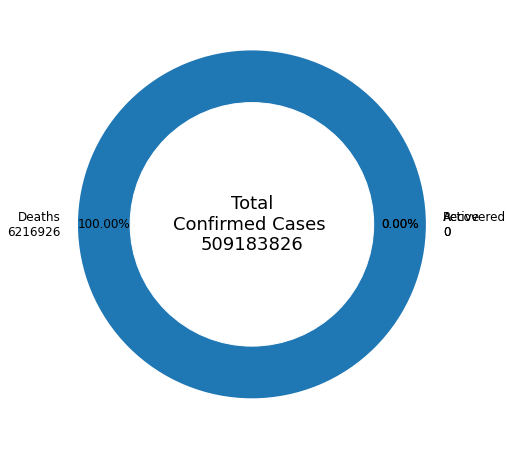

In [23]:
labels =  [df_global_cases.columns[i]+ "\n" + str(int(df_global_cases.values[0][i])) for i in range(1,4)]
values = [df_global_cases.values[0][i] for i in range(1,4)]
plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct='%1.2f%%', pctdistance=0.85, labeldistance=1.1, textprops = {'fontsize':12})
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.text(0, 0, "Total\nConfirmed Cases \n"+str(int(df_global_cases.values[0][0])), horizontalalignment='center', verticalalignment='center', size=18)
plt.show()

### Daily confirmed cases

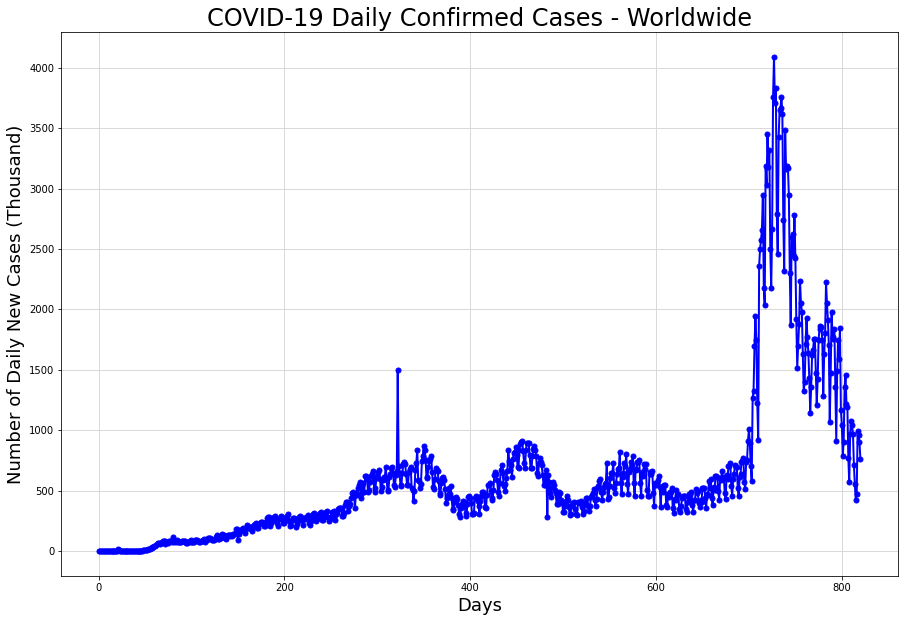

In [24]:
daily_cases = np.nan_to_num(df_confirmed.sum()[5:].diff())
f = plt.figure(figsize=(15,10))
date = np.arange(0,len(daily_cases))
marker_style = dict(linewidth=2, linestyle='-', marker='o',markersize=5)
plt.plot(date, daily_cases/1000,"-.",color="blue",**marker_style)

# Grid Settings
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

#Title
plt.title("COVID-19 Daily Confirmed Cases - Worldwide",{'fontsize':24})

# Axis Label
plt.xlabel("Days",fontsize =18)
plt.ylabel("Number of Daily New Cases (Thousand)",fontsize =18)

plt.show()

### Daily Deaths

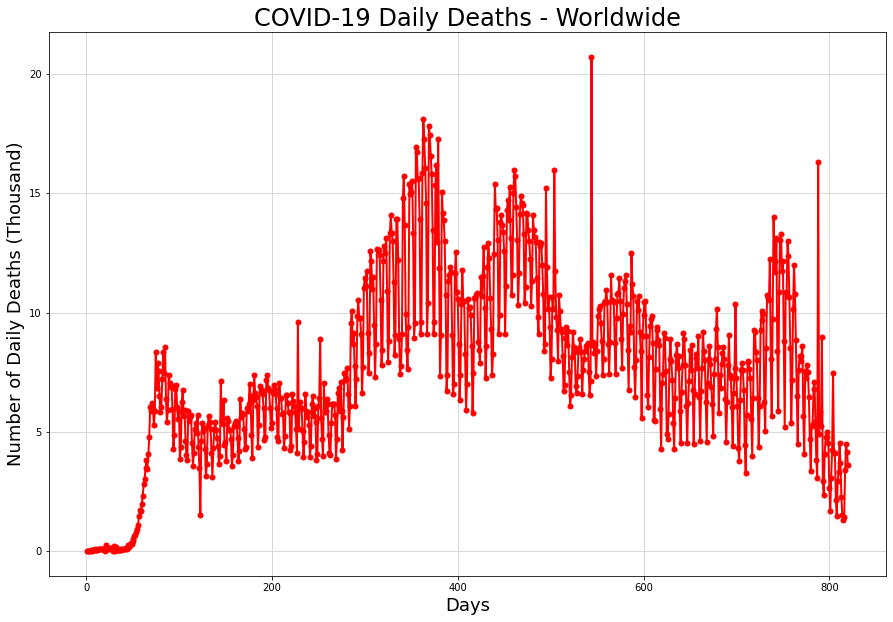

In [25]:
daily_deaths = np.nan_to_num(df_deaths.sum()[5:].diff())
f = plt.figure(figsize=(15,10))
date = np.arange(0,len(daily_deaths))
marker_style = dict(linewidth=2, linestyle='-', marker='o',markersize=5)
plt.plot(date, daily_deaths/1000,"-.",color="red",**marker_style)

# Grid Settings
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

#Title
plt.title("COVID-19 Daily Deaths - Worldwide",{'fontsize':24})

# Axis Label
plt.xlabel("Days",fontsize =18)
plt.ylabel("Number of Daily Deaths (Thousand)",fontsize =18)

plt.show()

## Content-wise analysis

In [28]:
df_continents = df_covid19.drop(['Country', 'Lat', 'Long_', 'Incident_Rate', 'Mortality_Rate'], axis=1)

In [29]:
df_continents_cases = df_continents.groupby('Continent').sum()
df_continents_cases['Mortality_Rate'] = np.round((df_continents_cases["Deaths"]/df_continents_cases["Confirmed"])*100,2)
df_continents_cases.drop(['Others'], inplace=True)
df_continents_cases

,Confirmed,Deaths,Recovered,Active,Cases_28_Days,Deaths_28_Days,Mortality_Rate
Continent,,,,,,,
Africa,11636219,252781,0.0,0.0,139100,1246,2.17
Asia,146826185,1399827,0.0,0.0,11011331,23177,0.95
Australia,6719921,9324,0.0,0.0,1735439,1593,0.14
Europe,190212296,1807132,0.0,0.0,14612102,45801,0.95
North America,95683032,1426679,0.0,0.0,1425635,17598,1.49
South America,56583590,1292809,0.0,0.0,726179,7229,2.28


### Overview

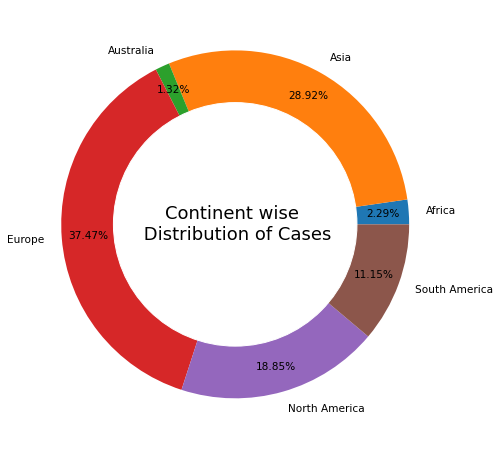

In [30]:
labels = list(df_continents_cases.index)
sizes = df_continents_cases['Confirmed'].values
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', pctdistance=0.85, labeldistance=1.1, textprops = {'fontsize':10.5})
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.text(0, 0, "Continent wise \n Distribution of Cases", horizontalalignment='center', verticalalignment='center', size=18)
plt.show()

### Daily confirmed cases

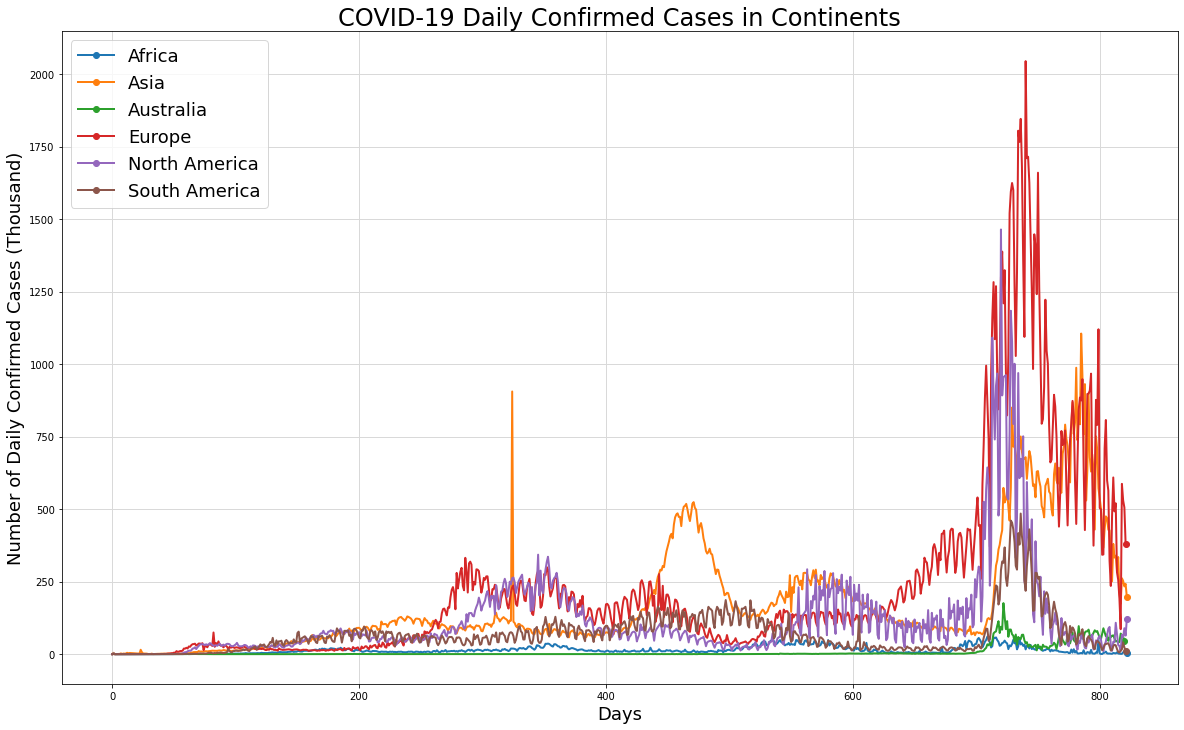

In [31]:
daily_cases_continents = df_confirmed.groupby('Continent').sum().diff(axis=1).replace(np.nan,0)
daily_cases_continents = daily_cases_continents[daily_cases_continents.index!='Others']
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,continent in enumerate(daily_cases_continents.index):
    t = daily_cases_continents.loc[daily_cases_continents.index == continent].values[0]
    t = t[t>=0]
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/1000,'-o',label = continent,linewidth =2, markevery=[-1])

# Grid Settings
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

#Title
plt.title("COVID-19 Daily Confirmed Cases in Continents",{'fontsize':24})

# Axis Label
plt.xlabel("Days",fontsize =18)
plt.ylabel("Number of Daily Confirmed Cases (Thousand)",fontsize =18)

# Legend
plt.legend(fontsize=18)

plt.show()

### Daily deaths

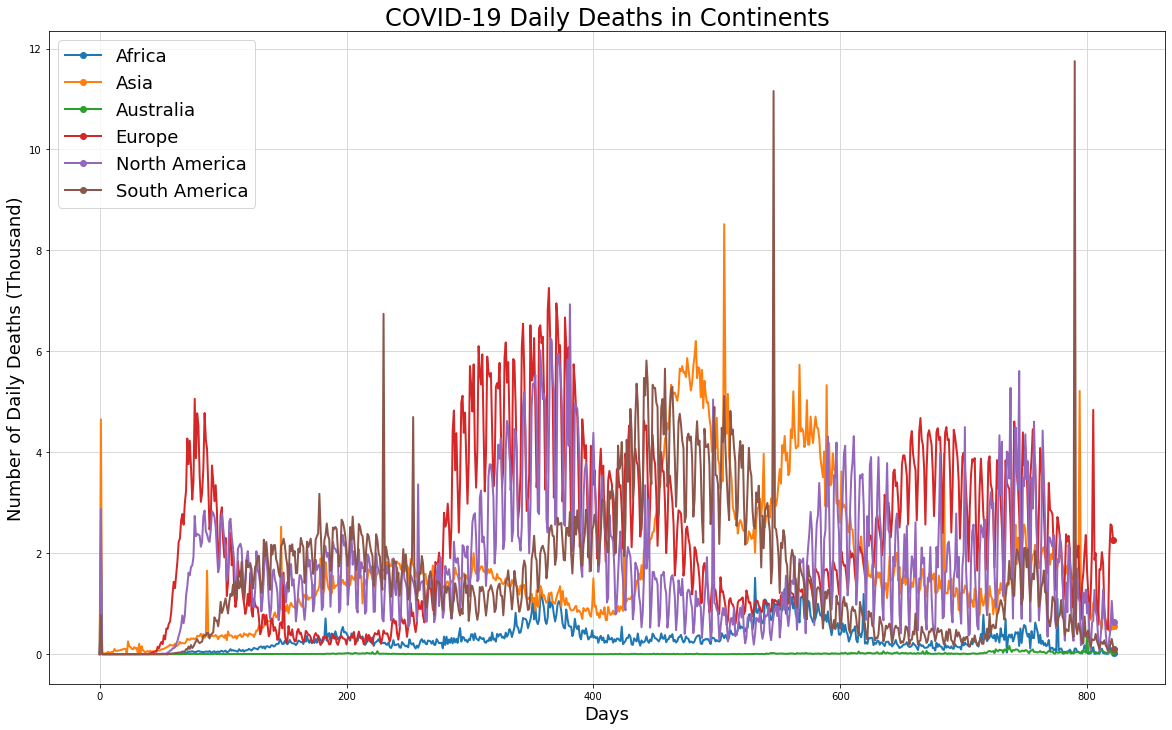

In [32]:
daily_deaths_continents = df_deaths.groupby('Continent').sum().diff(axis=1).replace(np.nan,0)
daily_deaths_continents = daily_deaths_continents[daily_deaths_continents.index!='Others']
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,continent in enumerate(daily_deaths_continents.index):
    t = daily_deaths_continents.loc[daily_deaths_continents.index == continent].values[0]
    t = t[t>=0]
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/1000,'-o',label = continent,linewidth =2, markevery=[-1])

# Grid Settings
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

#Title
plt.title("COVID-19 Daily Deaths in Continents",{'fontsize':24})

# Axis Label
plt.xlabel("Days",fontsize =18)
plt.ylabel("Number of Daily Deaths (Thousand)",fontsize =18)

# Legend
plt.legend(fontsize=18)

plt.show()

### Visualization on worldmap

In [35]:
df_continents_cases['Latitude'] = [6.426117205286786, 44.94789322476297, -25.734968546496344, 44.94789322476297, 56.51520886670177, -31.065922730080157]
df_continents_cases['Longitude'] = [18.2766152761759, 95.7503726784575, 134.489562782425, 28.2490403487619, -92.32043635079269, -60.7921128171538]
df_continents_cases.head()

,Confirmed,Deaths,Recovered,Active,Cases_28_Days,Deaths_28_Days,Mortality_Rate,Latitude,Longitude
Continent,,,,,,,,,
Africa,11636219,252781,0.0,0.0,139100,1246,2.17,6.426117,18.276615
Asia,146826185,1399827,0.0,0.0,11011331,23177,0.95,44.947893,95.750373
Australia,6719921,9324,0.0,0.0,1735439,1593,0.14,-25.734969,134.489563
Europe,190212296,1807132,0.0,0.0,14612102,45801,0.95,44.947893,28.249040
North America,95683032,1426679,0.0,0.0,1425635,17598,1.49,56.515209,-92.320436


In [36]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2, max_zoom=6, min_zoom=2)
for i in range(0, len(df_continents_cases)):
    folium.Circle(
        location=[df_continents_cases.iloc[i]['Latitude'], df_continents_cases.iloc[i]['Longitude']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_continents_cases.index[i]+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Active: "+str(df_continents_cases['Active'][i])+"</li>"+
        "<li>Confirmed: "+str(df_continents_cases['Confirmed'][i])+"</li>"+
        "<li>Deaths:   "+str(df_continents_cases['Deaths'][i])+"</li>"+
        "</ul>",
        radius=(int((np.log(df_continents_cases['Confirmed'][i]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)
world_map